In [1]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import pandas as pd

## Getting the data

In [2]:
client_id = '2ae4aedbffd84b10957e33bccfe38b09' 
client_secret = '1ff7a4f4d0034fea91a5f3349f238ef5'
rur = 'http://localhost:8080' # redirected URI
scope = 'user-library-read' 
user = '31s6pzamp4g72u47ltcpw3dlrlc4' 

In [3]:
# connecting WEB API
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=client_id, 
    client_secret=client_secret, 
    redirect_uri=rur, 
    scope=scope, 
    username=user))

In [4]:
# extend the validity
util.prompt_for_user_token(username=user,
                           scope=scope,
                           client_id=client_id,
                           client_secret=client_secret,
                           redirect_uri=rur)

'BQCEIy6B5OI8-ojoz2waPhVildnfjYjV5O1eMMK9kF1gw8Vsvu8J44buSuPjZMp14jZHsFNmTUexzYdCwkeyk25UtHLZFuAUHq9aZE4d4piueCElnuESqYhmnOB80VnxTcfGrTj6KvABD2eiuxXE7f57Ph98v94qjOr6LJHTkSMY959o8cI'

In [5]:
lib = {'band':[], 
       'track':[],
       'id':[],
       'acousticness':[], 
       'danceability':[], 
       'duration_ms':[], 
       'energy':[], 
       'instrumentalness':[], 
       'key':[], 
       'liveness':[],
       'loudness':[], 
       'mode':[], 
       'speechiness':[],  
       'tempo':[], 
       'time_signature':[], 
       'valence':[]}

In [6]:
# Getting the track list
# Adding the artist into the dictionary

i = 0
while True:
        results = sp.current_user_saved_tracks(limit=50, offset=i)
        if len(results['items']) != 0:
            for idx, item in enumerate(results['items']):
                track = item['track']
                lib['band'].append(track['artists'][0]['name'])
                lib['track'].append(track['name'])
                lib['id'].append(track['id'])
            i+=50
        else: 
            break

In [7]:
for i in range(len(lib['track'])):
    tf = sp.audio_features(lib['id'][i])
    lib['acousticness'].append(tf[0]['acousticness'])
    lib['danceability'].append(tf[0]['danceability'])
    lib['duration_ms'].append(tf[0]['duration_ms'])
    lib['energy'].append(tf[0]['energy'])
    lib['instrumentalness'].append(tf[0]['instrumentalness'])
    lib['key'].append(tf[0]['key'])
    lib['liveness'].append(tf[0]['liveness'])
    lib['loudness'].append(tf[0]['loudness'])
    lib['mode'].append(tf[0]['mode'])
    lib['speechiness'].append(tf[0]['speechiness'])
    lib['tempo'].append(tf[0]['tempo'])
    lib['time_signature'].append(tf[0]['time_signature'])
    lib['valence'].append(tf[0]['valence'])

In [8]:
#duration in minutes
lib['duration_min'] = list()

for i in range(len(lib['duration_ms'])):
    lib['duration_min'].append(lib['duration_ms'][i] / 60000)

In [9]:
ldf = pd.DataFrame.from_dict(lib)
#ldf.to_excel('my_spotify_playlist_features.xlsx')

## EDA

In [10]:
ldf.head()

,band,track,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
0,In Flames,Behind Space,17FBAPRaDeIGL5Ou3tS4OO,0.000842,0.360,294467,0.889,0.00626,7,0.2820,-9.415,0,0.0773,116.947,3,0.0864,4.907783
1,In Flames,Everything Counts,53xePhyhv38ZC4hxS7cuWd,0.000475,0.551,197693,0.983,0.51800,8,0.3270,-5.058,1,0.1100,124.093,4,0.2170,3.294883
2,In Flames,Gyroscope,0qTctGYxe64fe6VXsXv8tr,0.000077,0.447,206200,0.953,0.91400,8,0.1630,-5.554,1,0.0776,136.238,4,0.3440,3.436667
3,In Flames,Behind Space '99,1SHxSQnZ1YuJfNQmGskowi,0.000031,0.228,238600,0.983,0.70200,1,0.0685,-4.912,1,0.1870,143.206,4,0.2690,3.976667
4,In Flames,Zombie Inc.,58Qx1Zift04WRUz1FT8iaN,0.000051,0.167,305307,0.960,0.40700,5,0.2530,-4.662,0,0.1230,169.897,4,0.3090,5.088450


In [11]:
ldf.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
count,1813.000000,1813.000000,1.813000e+03,1813.00000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000
mean,0.013885,0.462146,2.448663e+05,0.90575,0.126023,5.325979,0.223603,-4.871897,0.558742,0.093369,126.764873,3.961942,0.368126,4.081105
std,0.062461,0.123691,6.881770e+04,0.11310,0.250657,3.555640,0.159054,1.948735,0.496674,0.061163,29.703529,0.240003,0.204022,1.146962
min,0.000001,0.083900,6.846700e+04,0.17900,0.000000,0.000000,0.022200,-20.242000,0.000000,0.023400,66.751000,1.000000,0.027000,1.141117
25%,0.000048,0.393000,2.036930e+05,0.88000,0.000012,2.000000,0.103000,-5.685000,0.000000,0.049700,103.408000,4.000000,0.211000,3.394883
50%,0.000273,0.468000,2.322270e+05,0.94800,0.001510,5.000000,0.173000,-4.559000,1.000000,0.075600,120.613000,4.000000,0.341000,3.870450
75%,0.002650,0.537000,2.706400e+05,0.97600,0.082800,8.000000,0.317000,-3.640000,1.000000,0.117000,145.994000,4.000000,0.510000,4.510667
max,0.846000,0.956000,1.003747e+06,0.99800,0.975000,11.000000,0.958000,-0.320000,1.000000,0.501000,216.020000,5.000000,0.975000,16.729117


In [12]:
#Playlist's duration in days =)
round(ldf.duration_min.sum()/60/24,0)

5.0

In [13]:
# And one of songs is more than 16 minutes
ldf[ldf.duration_min == ldf.duration_min.max()]

,band,track,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
1007,Periphery,Reptile,2JeEIJFABPGktfB7tgQFX9,0.0012,0.277,1003747,0.91,0.000716,7,0.342,-5.723,1,0.117,118.375,4,0.112,16.729117


In [14]:
ldf['mode'].value_counts(normalize = True) 

1    0.558742
0    0.441258
Name: mode, dtype: float64

Well, I'm listening mostly major songs like Alternative Metal and Nu Metal.

Text(0.5, 1.0, 'Distribution by BPM')

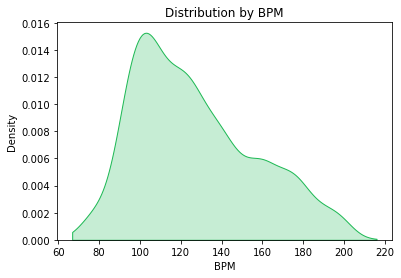

In [15]:
ax = sns.kdeplot(ldf['tempo'], shade=True, color="#1DB954", cut=0)

plt.xlabel("BPM")
plt.ylabel("Density")
plt.title("Distribution by BPM")

As I'm a drummer it's interesting for me to know the BPM rate of my favourite music. So again 100 - 140 BPM is most common for Alternative Metal, Nu Metal, Industrial Metal and so on. And punk, dethcore, metalcore, Swedish Melodeath and Groove Metal has mostly a tempo over 160 BPM.

In [16]:
ldf.query('track == "The Darkness is Revealing"')

,band,track,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
1517,Korn,The Darkness is Revealing,3PpoBKcbnoGQudHGkwJA4C,0.000378,0.551,220055,0.957,0.023,2,0.349,-3.609,1,0.0986,104.988,4,0.148,3.667583


Track that I'm learning to play now is 105 BPM. Not so speedy but it should be played in eights and sixteenth notes! So its still challenging. Let's find out the fastest track in my list:

In [17]:
ldf[ldf.tempo == ldf.tempo.max()]

,band,track,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
669,Angels & Airwaves,Everything's Magic,4eC8Cq2Q6zIelJgF4nC2DK,0.000065,0.409,231413,0.933,0.000052,0,0.147,-3.3,1,0.0458,216.02,4,0.859,3.856883


Angels & Airwaves is a project leading by Tom DeLong of Blink-182. As expected for pop-punk genre.

Text(0.5, 1.0, 'Distribution by time signature')

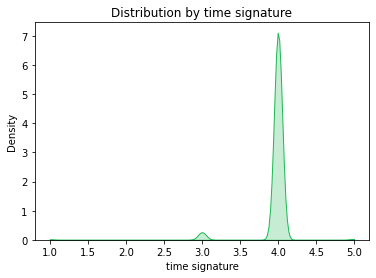

In [18]:
ax = sns.kdeplot(ldf['time_signature'], shade=True, color="#1DB954", cut=0)

plt.xlabel("time signature")
plt.ylabel("Density")
plt.title("Distribution by time signature")

Again this is true: rock and metal music is mostly played in 4/4 time signature. I don't like genres like math rock much. But there are songs with 5 time signature, let's find them out:

In [19]:
ldf[ldf.time_signature == ldf.time_signature.max()]

,band,track,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
139,Alexisonfire,This Could Be Anywhere in the World,4TnPmXU7KVmHZ51hXXn5Hv,0.000038,0.192,243853,0.737,0.000712,1,0.1400,-5.319,0,0.0835,83.763,5,0.266,4.064217
331,Siamese,Numb,4zCPkgquiudnQQN094HnY5,0.000133,0.310,210353,0.935,0.000069,5,0.0377,-6.636,0,0.0554,113.315,5,0.357,3.505883
524,The Prodigy,Light Up the Sky,7GpgT7sHaTg9nHUM8g888k,0.001680,0.198,199716,0.951,0.783000,1,0.3120,-5.786,1,0.1220,159.872,5,0.326,3.328600
544,Siamese,Rather Be Lonely,2uW6YUxo8pmJUSfDrSWq9K,0.000669,0.320,179000,0.879,0.000000,0,0.1540,-6.606,1,0.0945,96.927,5,0.620,2.983333
1140,Wake Up Hate,I Just Don't Love You Anymore,5EVC4M5ZJ6rG5Cq9JQehYE,0.000340,0.438,186000,0.892,0.026100,6,0.0403,-3.941,0,0.0465,175.105,5,0.699,3.100000
1242,Dark Tranquillity,Ego Deception,46r6LRWrRrTQpBzwZ1m9Zm,0.000592,0.357,261053,0.978,0.000564,1,0.0796,-5.648,0,0.1490,186.967,5,0.341,4.350883
1579,Deftones,Urantia,33WXUh74RZ4CEfUkpJwHWE,0.000010,0.297,270476,0.908,0.848000,5,0.1400,-3.173,0,0.0415,110.936,5,0.270,4.507933


Text(0.5, 1.0, 'Distribution by valence and energy')

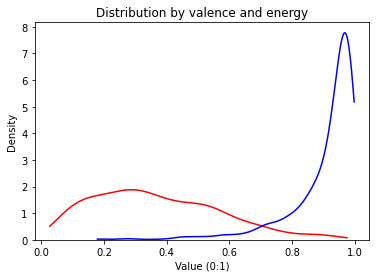

In [20]:
ax = sns.kdeplot(ldf['valence'], shade=False, color="red", cut=0)
ax = sns.kdeplot(ldf['energy'], shade=False, color="blue", cut=0)
plt.xlabel("Value (0:1)")
plt.ylabel("Density")
plt.title("Distribution by valence and energy")

Very interesting observation: my music is mostly sad and depressed and VERY energetic. I think that's 'cause I really enjoy listening to deathmetal especially melodic death. That energy left 'tail' might be doom metal and gothic rock songs.

Text(0.5, 1.0, 'Dependence of danceability and energy')

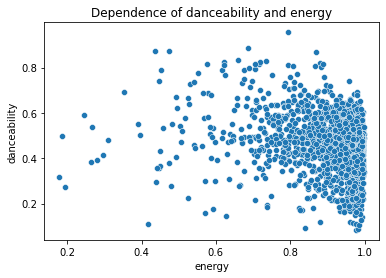

In [21]:
# Dependence of danceability and energy
ax = sns.scatterplot(x="energy", y="danceability", data=ldf)
plt.title("Dependence of danceability and energy")

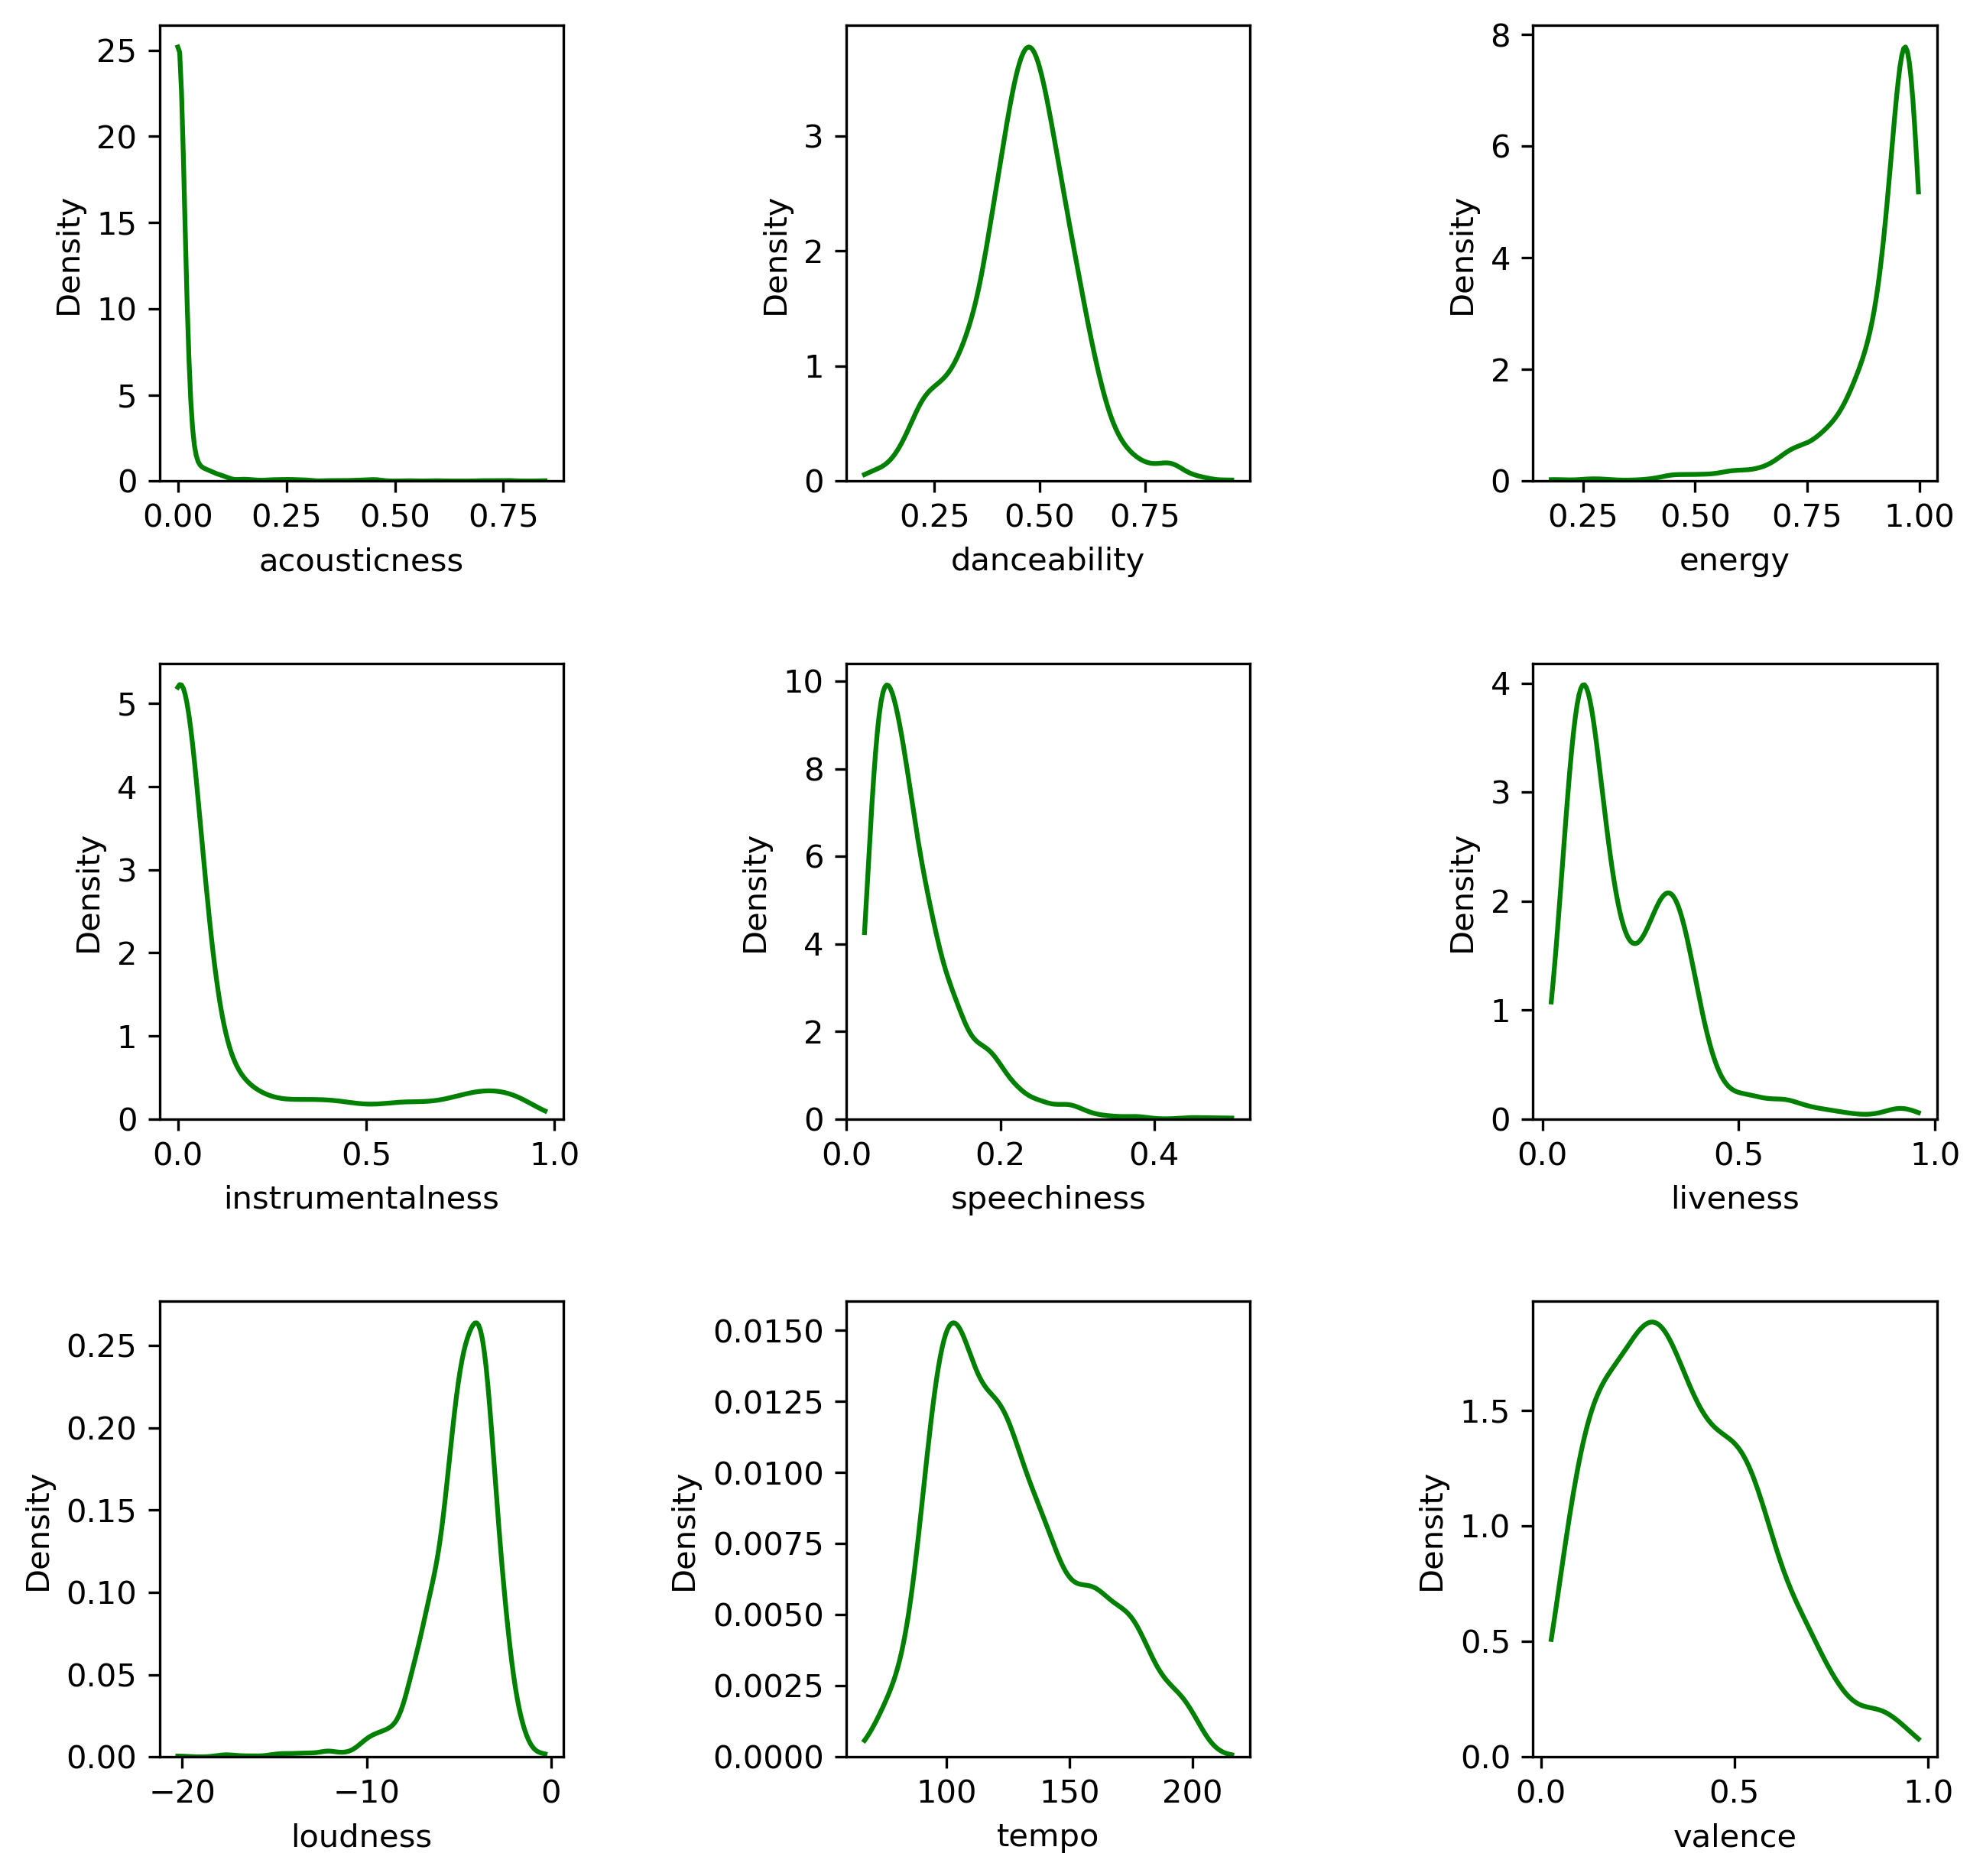

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10), dpi=300)
fig.subplots_adjust(hspace=0.4, wspace=0.7)
pylab.subplot (3, 3, 1)
ac = sns.kdeplot(ldf['acousticness'], shade=False, color="green", cut=0)

pylab.subplot (3, 3, 2)
ac = sns.kdeplot(ldf['danceability'], shade=False, color="green", cut=0)

pylab.subplot (3, 3, 3)
ac = sns.kdeplot(ldf['energy'], shade=False, color="green", cut=0)

pylab.subplot (3, 3, 4)
ac = sns.kdeplot(ldf['instrumentalness'], shade=False, color="green", cut=0)

pylab.subplot (3, 3, 5)
ac = sns.kdeplot(ldf['speechiness'], shade=False, color="green", cut=0)

pylab.subplot (3, 3, 6)
ac = sns.kdeplot(ldf['liveness'], shade=False, color="green", cut=0)

pylab.subplot (3, 3, 7)
ac = sns.kdeplot(ldf['loudness'], shade=False, color="green", cut=0)

pylab.subplot (3, 3, 8)
ac = sns.kdeplot(ldf['tempo'], shade=False, color="green", cut=0)

pylab.subplot (3, 3, 9)
ac = sns.kdeplot(ldf['valence'], shade=False, color="green", cut=0)

plt.show()

## Conclusion
I don't like live, acoustic and instrumental track versions that's true. My music is energetic and loud but rather grim, but at the same time it is quite possible to dance to it (which is quite unexpected). With lots of screaming and grouling vocals, elecric guitars and drums. And all of that we can see on plots above. You know what? Data never lies =)